<a href="https://colab.research.google.com/github/LiliBISC/PPE/blob/main/PPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code pour importer la base de donnée de :https://www.data.gouv.fr/fr/datasets/classification-du-reseau-routier-national/#community-resources

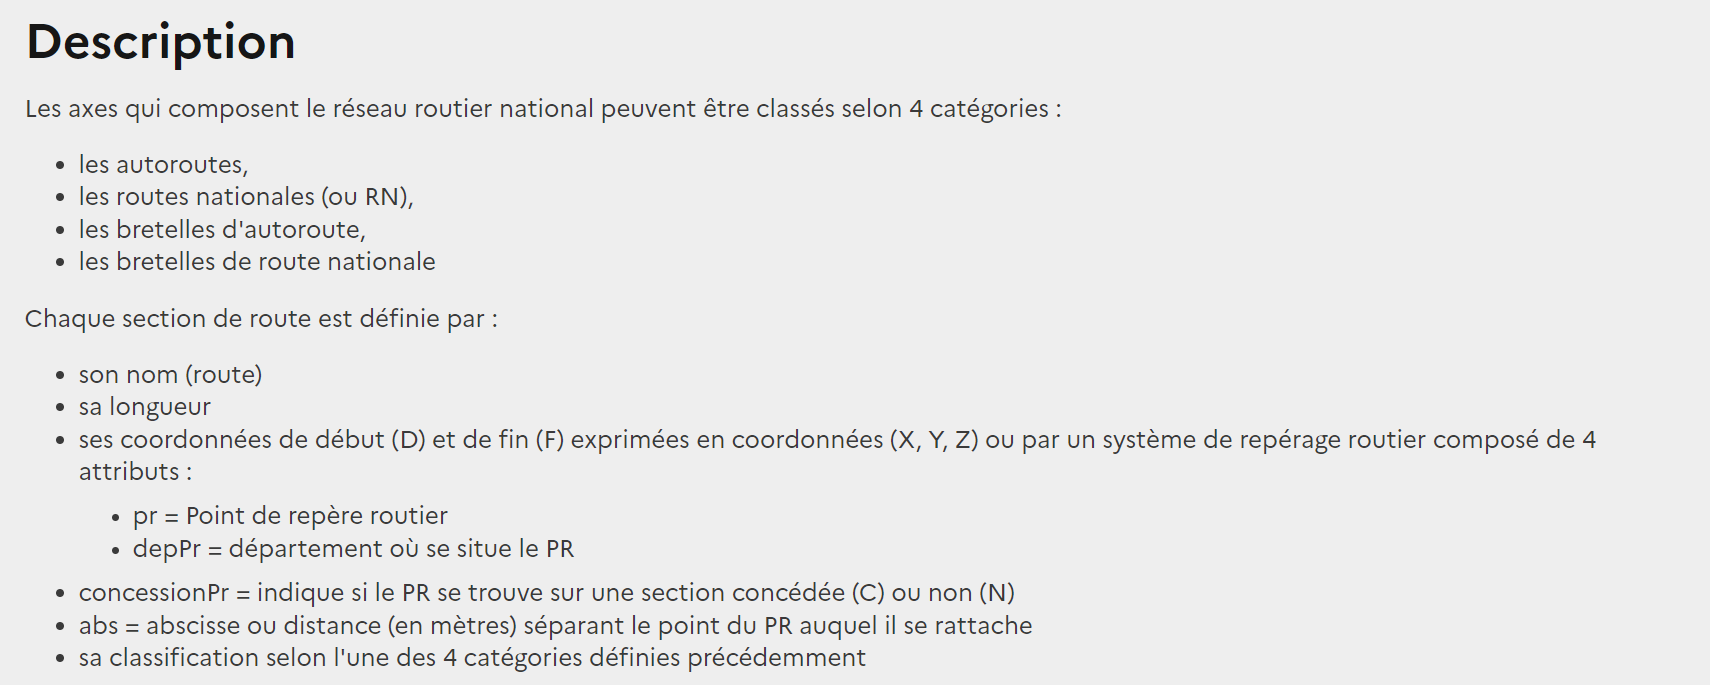!

In [111]:
import pandas as pd
import requests

r = requests.get('https://github.com/LiliBISC/PPE/blob/main/pont.xlsx?raw=true')
open('pont.xlsx', 'wb').write(r.content)
dfPont=pd.read_excel('pont.xlsx')


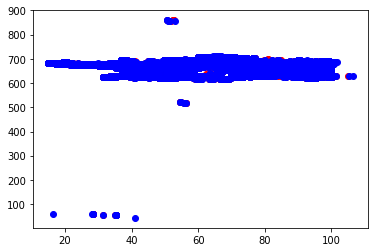

In [112]:
import matplotlib.pyplot as plt

pont_coord=pd.DataFrame()
pont_coord["Type"]=dfPont["Classification"]
pont_coord["xD"]=dfPont["xD"]/10000
pont_coord["yD"]=dfPont["yD"]/10000
pont_coord["xF"]=dfPont["xF"]/10000
pont_coord["yF"]=dfPont["yF"]/10000

pont_coord.drop_duplicates(subset ="xD", inplace=True,ignore_index=True)

plt.figure()
plt.plot(pont_coord["xD"].iloc[:],pont_coord["yD"].iloc[:],"ro")
plt.plot(pont_coord["xF"].iloc[:],pont_coord["yF"].iloc[:],"bo")


In [113]:
pont_coord.loc[:]["xD"]

0        42.209171
1        42.151033
2        42.239429
3        42.198063
4        42.980465
           ...    
11596    56.921225
11597    55.598861
11598    44.025210
11599    45.879885
11600    54.872284
Name: xD, Length: 11601, dtype: float64

In [114]:
import numpy as np

#fonction pour calculer les distances entre chaque point (utilisable pour les autres objets)
def dist(x_a,y_a,x_b,y_b):
  dist=np.sqrt((x_b-x_a)**2+(y_b-y_a)**2)
  return dist

#fonction qui trouve les voisins d'un point
  #x,y : les coordonnées de notre point cible
  #df:dataframe qui repertorie l'intégralité des points dans notre cas on s'interessera a xD,yD,xF,yF
def voisin(x,y,df):
  d=np.zeros(int(df.shape[0]))
  dfvoisin=pd.DataFrame()
  dfvoisin["x"]=df.loc[:]["xD"]
  dfvoisin["y"]=df.loc[:]["yD"]
  for i in range(int(df.shape[0])):
    d[i]=dist(x,y,df.iat[i,1],df.iat[i,2])
  
  dfvoisin["distance"]=d
  dfvoisin.sort_values(by=['distance'],inplace=True)
  dfvoisin.reset_index(drop=True, inplace = True)
  dfvoisin=dfvoisin.loc[:10]
  return dfvoisin


In [100]:
dfvoisin=voisin(pont_coord.iat[0,1],pont_coord.iat[0,2],pont_coord)

dfvoisin

,x,y,distance
0,42.209171,646.822401,0.000000
1,42.198063,646.792849,0.031571
2,42.151033,646.788946,0.067077
3,42.239429,646.756230,0.072761
4,42.146264,647.263699,0.445759
5,42.055447,647.656378,0.848026
6,42.054518,647.659346,0.851114
7,43.584895,645.572561,1.858687
8,43.566761,645.544836,1.864195
9,43.581566,645.548331,1.872624


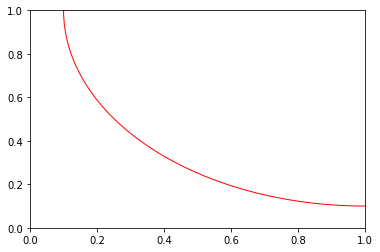

In [101]:
#Mise en place d'une fonction qui dessine un cercle autour d'une zone 
  #x,y : sont les coordonnées du cercle
  #prob : est la proba assimilée au cerlce => plus la proba est élevé plus le cercle est grand
def draw_circle(x,y,prob): 
  if prob<0.10:
    circle = plt.Circle( (x,y), 0.4 , fill = False , edgecolor="green")
  if prob<0.50 and prob>0.10 :
    circle = plt.Circle( (x,y), 0.6 , fill = False , edgecolor="blue" )
  if prob>0.50 and prob<0.70:
    circle = plt.Circle( (x,y), 0.8 , fill = False , edgecolor="orange")
  if prob<1 and prob>0.70:
    circle = plt.Circle( (x,y), 0.9 , fill = False , edgecolor="red")
  return circle

plt.gca().add_artist(draw_circle(1,1,0.8))